In [3]:
import pandas as pd

In [6]:
#caminho Dani
bruto = pd.read_csv(r'C:\JupyterLab\2° Semestre\Machine Learning\ML-2022-DIMP\Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

In [ ]:
#caminho Isa
bruto = pd.read_csv()

In [94]:
#caminho Marcos
bruto = pd.read_csv(r'C:\Users\marcos220057\OneDrive - CNPEM - Centro Nacional de Pesquisa em Energia e Materiais\2sem2022\Aprendizado de Máquina\Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

In [45]:
#caminho Paola
bruto = pd.read_csv(r'C:\JupyterLab\ML-2022-DIMP\Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

In [95]:
# Excluir as colunas que tem NaN
bruto_completo = bruto.dropna(axis = 1, how ='any')
del bruto_completo['file_name']

In [96]:
del bruto_completo['charge_state']

In [4]:
#Calculado a matriz de correlação peterson para ver quais atributos são bons para energia de Fermi
bruto_completo.shape
corrmat = bruto_completo.corr()

NameError: name 'bruto_completo' is not defined

In [ ]:
#printando os atributos que correlacionam melhor que 0.782
Atr1 = []
Ef = bruto_completo['Fermi_energy']
for i in corrmat['Fermi_energy'].keys():
    if abs(corrmat['Fermi_energy'][i]) > 0.782:
        Atr1.append(i)
        print(i, 'correlation:', corrmat['Fermi_energy'][i])
        print()

In [ ]:
Et = bruto_completo['total_energy']
Atr2 = []
for i in corrmat['total_energy'].keys():
    if abs(corrmat['total_energy'][i]) > 0.93:
        print(i, corrmat['total_energy'][i])
        Atr2.append(i)
        print()

In [ ]:
import lmfit 
import matplotlib.pyplot as plt

In [ ]:
def plotar(x, y, ux = 0, uy = 0, reta = False, legendas = ['x', 'y'], c='b', save = False, line = False):
    '''
    Essa função plota um gráfico de pontos ou de linha com ou sem barras de incerteza e com ou sem regressão linear.
    Argumentos obrigatórios:
    - x: Lista valores de x
    - y: Lista valores de y
    
    Argumentos opcionais:
    - ux: Lista com os valores de incertezas de x (dafault: ux = 0)
    - uy: Lista com os valores de incertezas de y (dafault: uy = 0)
    - reta: bool que define se quer regressão linear ou não (default: reta = False)
    - legendas: lista com duas strings correspondentes àa legendaa do eixo x e y (default: legendas = ['x', 'y'])
    - c: string da cor dos pontos (default: c = 'b')
    - save: string com o nome de um arquivo png, ou o bool False para não salvar (default: save = False)
    
    '''
    config = {'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',}

    plt.style.use(['seaborn-whitegrid', 'seaborn-paper', 'seaborn-muted', config])
    fig,ax1 = plt.subplots(1,1)
    ax1.tick_params(direction='in', which='both',top=True,right=True,labelsize=12)
    
    #Labels
    ax1.set_ylabel(legendas[1], fontsize=12)
    ax1.set_xlabel(legendas[0], fontsize=12)
    #regressão linear
    if reta == True:
        def reta(x, a, b):
            return a*x + b

        reta_model=lmfit.Model(reta)

        #se der errado tentar mexer nesses valores do chute inicial:
        
        reta_model.set_param_hint('a',value=1,min= -1000000,max=3000000,vary=True) 
        reta_model.set_param_hint('b',value=1,min=-200000,max=2000000,vary=True) 
        param = reta_model.make_params()

        results = reta_model.fit(y, x = x, params = param)
        #print(results.fit_report())
        ax1.plot(x, y, 'o', markersize=0.3)
        ax1.plot(x,results.best_fit,label="Regressão Linear", c = 'r', linewidth=2) ; ax1.legend(fontsize='small')
    if line == True:
        ax1.plot(x, y)
    elif ux == 0 and uy == 0:
        ax1.plot(x, y, 'bo')

    else:
        ax1.errorbar(x, y, yerr=uy, xerr=ux, fmt='o',elinewidth=1,capsize=3,capthick=1,ms=3,c=c,ecolor='black')
    #save
    if save != False:
        plt.tight_layout()
        plt.savefig(save, dpi=200)
        plt.show()

In [ ]:
#Atr1.remove(Atr1[-1])
for i in Atr1:
    plotar(bruto_completo[i], Ef, legendas = [i, 'Fermi energy'],reta = True)

In [ ]:
#Atr2.remove(Atr2[-1])
for i in Atr2:
    plotar(bruto_completo[i], Et, legendas = [i, 'total_energy'], reta = True)

In [ ]:
dataEf = {}
for i in Atr1:
    dataEf.update({i:bruto[i]})
dataEf = pd.DataFrame(dataEf)

In [5]:
import seaborn as sns

In [6]:
corrmat1 = dataEf.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat1, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)

NameError: name 'dataEf' is not defined

In [ ]:
dataEt = {}
for i in Atr2:
    dataEt.update({i:bruto[i]})
dataEt = pd.DataFrame(dataEt)

In [ ]:
corrmat1 = dataEt.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat1, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)

In [ ]:
del bruto_completo['Shape']

In [ ]:
import numpy as np

In [ ]:
atributos_1 = {}
for i in bruto_completo.keys():
    if np.isfinite(corrmat['Fermi_energy'][i]):
        atributos_1.update({i : abs(corrmat['Fermi_energy'][i])})

In [ ]:
L = sorted(atributos_1,key = atributos_1.get,  reverse = True)
L.remove('Fermi_energy')
print(L[0])

In [ ]:
L = L[0:100]
L1 = L.copy()
for i in L:
    for k in L:
        if i < k and abs(corrmat[i][k])>0.8:
            if abs(corrmat['Fermi_energy'][i]) > abs(corrmat['Fermi_energy'][k]) and k in L1 and i in L1:
                L1.remove(k)
            elif k in L1 and i in L1:
                L1.remove(i)

In [ ]:
#Esses serão os atributos para calcular a energia de Fermi (resta saber o que eles significam
for i in L1:
    print(i, ' correlation:',corrmat['Fermi_energy'][i])
    print()

In [ ]:
M = {}
M.update({'Fermi_energy':bruto['Fermi_energy']})
for i in L1:
    M.update({i:bruto[i]})
M = pd.DataFrame(M)
corrmat_F = M.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat_F, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)
plt.savefig('atributos_energia_fermi.png', dpi = 200)

In [ ]:
Dados_Fermi = M.copy()

In [ ]:
Dados_Fermi.to_csv(r"C:\JupyterLab\meu-jupyter-ilum\2° semestre\AM\ML-2022-DIMP\Dados_Fermi.csv")

In [ ]:
atributos_2 = {}
for i in bruto_completo.keys():
    if np.isfinite(corrmat['total_energy'][i]):
        atributos_2.update({i : abs(corrmat['total_energy'][i])})

In [ ]:
L2 = sorted(atributos_2,key = atributos_2.get,  reverse = True)
L2.remove('total_energy')
print(L2[0])

In [ ]:
L2 = L2[0:100]
Lb = L2.copy()
for i in L2:
    for k in L2:
        if i < k and abs(corrmat[i][k])>0.7:
            if abs(corrmat['total_energy'][i]) > abs(corrmat['total_energy'][k]) and k in Lb and i in Lb:
                Lb.remove(k)
            elif k in Lb and i in Lb:
                Lb.remove(i)

In [ ]:
#Esses serão os atributos para calcular a energia de Fermi (resta saber o que eles significam
for i in Lb:
    print(i, ' correlation:',corrmat['total_energy'][i])
    print()

## Pessoal, notem que a energia total depende praticamente só do numero de atomos, então talvez seja mais interessante a gente fazer a energia por atomo.

## Vamos fazer energia por atomo então:

In [ ]:
E = []
i = 0
while i < len(bruto_completo['C']):
    E.append(bruto_completo['total_energy'][i]/bruto_completo['atom_number_total'][i])
    i = i+1
print(len(bruto_completo['total_energy']), len(E))

In [ ]:
Dados = bruto_completo.assign(energy_per_atom = E)

In [ ]:
plotar(Dados['atom_number_total'], Dados['energy_per_atom'], legendas = ['atom_number_total', 'energy_per_atom'], reta = True)

In [ ]:
Dados.shape
corrmat = Dados.corr()

In [ ]:
atributos_3 = {}
for i in Dados.keys():
    if np.isfinite(corrmat['energy_per_atom'][i]):
        atributos_2.update({i : abs(corrmat['energy_per_atom'][i])})

In [ ]:
L3 = sorted(atributos_2,key = atributos_2.get,  reverse = True)
L3.remove('energy_per_atom')
L3.remove('Fermi_energy')
print(L3[0])

In [ ]:
L3 = L3[0:100]
Lb = L3.copy()
for i in L3:
    for k in L3:
        if i < k and abs(corrmat[i][k])>0.76:
            if abs(corrmat['energy_per_atom'][i]) > abs(corrmat['energy_per_atom'][k]) and k in Lb and i in Lb:
                Lb.remove(k)
            elif k in Lb and i in Lb:
                Lb.remove(i)

In [ ]:
#Esses serão os atributos para calcular a energia de Fermi (resta saber o que eles significam
for i in Lb:
    print(i, ' correlation:',corrmat['energy_per_atom'][i])
    print()

In [ ]:
M = {}
M.update({'energy_per_atom':Dados['energy_per_atom']})
for i in Lb:
    M.update({i:bruto[i]})
M = pd.DataFrame(M)
corrmat_F = M.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat_F, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)
plt.savefig('atributos_energia_por_atomo.png', dpi = 200)

In [7]:
Dados_energia = M.copy()

NameError: name 'M' is not defined

In [132]:
Dados_energia.to_csv(r"C:\JupyterLab\ML-2022-DIMP\CSVs\Dados_energia.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\JupyterLab\\ML-2022-DIMP\\CSVs\\Dados_energia.csv'

#### vamos agora utilizar os Data Frames com os dados que nós realmente vamos utilizar, de energia de Fermi e por átomo

In [8]:
#caminho pc paola
df_fermi = pd.read_csv (r"C:\JupyterLab\ML-2022-DIMP\CSVs\Dados_Fermi.csv")
df_energia= pd.read_csv(r"C:\JupyterLab\ML-2022-DIMP\CSVs\Dados_energia.csv")

In [9]:
#caminho pc isadora
df_energia= pd.read_csv(r"C:\JupyterLab\ML-2022-DIMP\CSVs\Dados_energia.csv")
df_fermi= pd.read_csv(r"C:\JupyterLab\ML-2022-DIMP\CSVs\Dados_Fermi.csv")

### 4 análise exploratória dos dados

In [10]:
print(df_fermi.dtypes,df_energia.dtypes)

Unnamed: 0                    int64
energy_per_atom             float64
O_concentration             float64
C-O-H_C-sp1-H:mean_value    float64
ether_concentration         float64
H-O_coordination_number     float64
O_n12_m2                    float64
prox_Ixx_ether_area         float64
norm_density_ether_std      float64
sp2-like_n11_m3             float64
max_bond_angle              float64
dtype: object Unnamed: 0                    int64
energy_per_atom             float64
O_concentration             float64
C-O-H_C-sp1-H:mean_value    float64
ether_concentration         float64
H-O_coordination_number     float64
O_n12_m2                    float64
prox_Ixx_ether_area         float64
norm_density_ether_std      float64
sp2-like_n11_m3             float64
max_bond_angle              float64
dtype: object


In [95]:
# dados da energia de fermi
print( df_fermi.describe())

         Unnamed: 0  energy_per_atom  O_concentration  \
count  20396.000000     20396.000000     20396.000000   
mean   10197.500000       -47.411872         0.152450   
std     5887.962381         2.340781         0.057251   
min        0.000000       -56.538455         0.036649   
25%     5098.750000       -48.594539         0.116279   
50%    10197.500000       -46.847004         0.142064   
75%    15296.250000       -45.807262         0.173293   
max    20395.000000       -43.156884         0.287908   

       C-O-H_C-sp1-H:mean_value  ether_concentration  H-O_coordination_number  \
count              20396.000000         20396.000000             20396.000000   
mean                 107.504723             0.304668                 0.466049   
std                    0.419334             0.114202                 0.216221   
min                  105.970000             0.100000                 0.060000   
25%                  107.220000             0.231481                 0.330000   


In [ ]:
#dados da energia por átomo
print(df_)

In [137]:
def histograma(x, density=False, c = 'r', bins = 'sqrt', save = False, legendas = ['x', 'Frequência'], title = 'Histograma'):
    '''
    Plota um histograma a partir de uma lista de dados.
    Argumentos obrigatórios:
    - x: Lista dos valores da medição/dados
    
    Argumentos opcionais:
    - Density: bool que, se for True, faz com que o histograma mostre densidade de probabilidade (default: density=False)
    - c: string para a cor das barras do histograma (default: c = 'r')
    - bins: método de determinação do tamanho de intervalos do histograma (default: bins = 'sqrt')
    - save: string com o nome do arquivo png para salvar o grafico. Se save = False, então não irá salvar. (default: save = False)
    - legendas: lista das strings de legenda dos eixos (default: legendas = ['x', 'Frequência'])
    
    '''
    config = {'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',}
    
    plt.style.use(['seaborn-whitegrid', 'seaborn-paper', 'seaborn-muted', config])
    fig,axh = plt.subplots(1,1)
    H = plt.hist(x,bins = bins, color = c,density = density)
    axh.set_title(title)
    axh.set_ylabel(legendas[1],fontsize=12)
    axh.set_xlabel(legendas[0],fontsize=12)
    if save != False:
        plt.savefig(save, dpi=200)

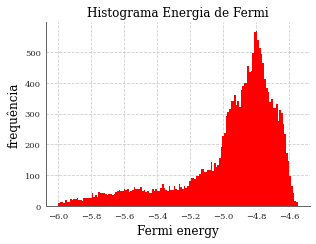

In [139]:
histograma(bruto_completo['Fermi_energy'], legendas = ['Fermi energy', 'frequência'],title = 'Histograma Energia de Fermi', save = 'histograma_fermi.png')

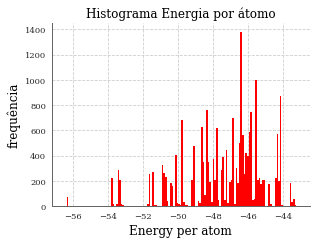

In [141]:
histograma(M['energy_per_atom'], legendas = ['Energy per atom', 'frequência'],title = 'Histograma Energia por átomo', save = 'histograma_energia.png')